<font size=4>**Πλαίσιο Μαθήματος**


1. Απεύθυνση σε φοιτητές κατεύθυνσης (3ο-4ο έτος), με κάποιες γνώσεις αστροφυσικής (όπως απαντήθηκε απο την επιτροπή).
2. Ελεύθερη επιλογή θέματος - βασίστηκε στο όραμα για ανάπτυξη μεταβιβάσιμων δεξιοτήτων στην εποχή της ΤΝ.
3. Χρήση Jupyter notebook, που δίνει την δυνατότητα</br> 
  α. για ένα εργαστηριακό μάθημα με άμεση διάδραση με τον χρήστη </br>
  β. να τρέχει σε ζωντανό χρόνο, αλλά είναι κατάλληλο για αυτομελέτη<br>
  γ. εφαρμογής του κώδικα κατευθείαν στα δεδομένα του χρήστη.
4. Τρέχει online (δεν χρειάζεται εγκατάσταση).
5. Παράδειγμα από Αστροφυσική, αλλά γενικεύεται εύκολα και σε άλλα προβλήματα.

</font>

</div>


# Eισαγωγή στην επιλογή χαρακτηριστικών (feature selection)

<div class="alert alert-block alert-info" style="margin-top: 20px">


<b>ΣΥΝΟΠΤΙΚΑ</b>

Σε αυτό το σημειωματάριο γίνεται μια εισαγωγή στην επιλογή χαρακτηριστικών (features selection) που χρησιμοποιείται γενικότερα στην ανάλυση δεδομένων αλλά και στην μηχανική μάθηση. Πιο συγκεκριμένα θα δούμε: 
    
- περιγραφή ενός προβλήματος
- τα δεδομένα του δείγματός μας
- χειροκίνητη επιλογή χαρακτηριστικών
- αυτοματοποιημένη επιλογή χαρακτηριστικών 
    
$\rightarrow$ Ο στόχος είναι να <u>κατανοήσετε</u> πως μπορείτε να πραγματοποιήσετε την επιλογή των χαρακτηριστικών για ένα δεδομένο πρόβλημα.
</div>

- - - 

## Περιγραφή προβλήματος

- Φασματική ταξινόμηση άστρου μόνο μέσα από φασματικές παρατηρήσεις. 
- Χρονοβόρες και ανέφικτες για μεγάλο αριθμό στόχων (100s).
- Φωτομετρία επιτρέπει την _ταυτόχρονη_ παρατήρηση πολλών χιλιάδων στόχων. 
- Παρατηρήσεις μέσα από μια σειρά διαφορετικών φίλτρων ισοδυναμεί με δειγματοληψία του φάσματος (οπότε ένα πολύ χαμηλής ανάλυσης "φάσμα"). 


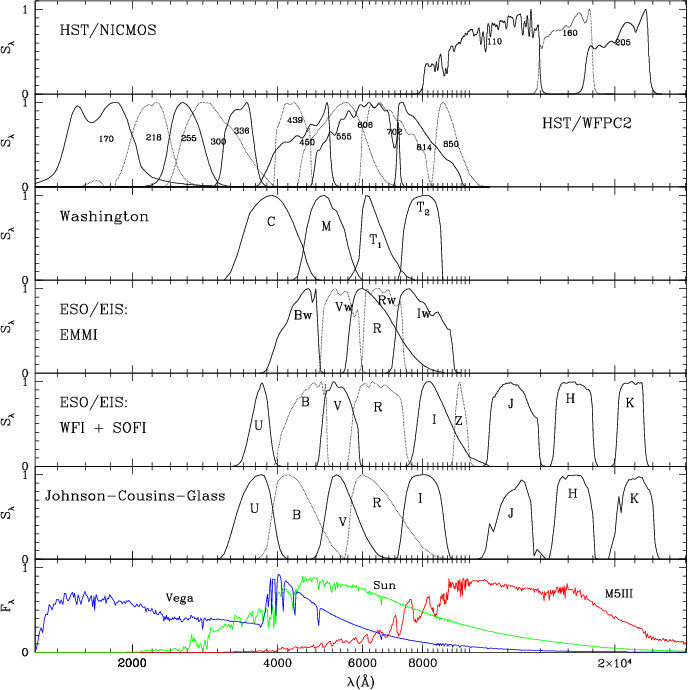
<center>Εικόνα 1. Καμπύλες απόκρισης για διαφορετικά συστήματα φίλτρων μαζί με κάποια ενδεικτικά φάσματα άστρων, όπως του Βέγα, του Ήλιου, και ενός Μ5 γίγαντα (εικ. από το <a href="https://ui.adsabs.harvard.edu/abs/2002A%26A...391..195G/abstract" target="_blank" rel="noopener noreferrer">Girardi et al. (2002)</a>).<center><br>
    

## Στόχος

> Δεδομένου ενός συνόλου δεδομένων από διαφορετικά αντικείμενα (άστρα μεγάλης μάζας στο Μεγάλο Μαγγελανικό Νέφος) με παρατηρήσεις σε ένα σύνολο φωτομετρικών μετρήσεων (οπτικό ως μέσο υπέρυθρο), να βρούμε ποιες από τις φωτομετρικές αυτές μετρήσεις (χαρακτηριστικά) μας βοηθάνε περισσότερο στο να ξεχωρίσουμε τις κλάσεις που ανήκουν.

Τα αντικείμενα χωρίζονται σε αστέρια διαφορετικών τύπων: OBA (αντικείμενα κύριας ακολουθίας), OBAe (υποκατηγορία των αστεριών OBA με δίσκους και εκπομπές γραμμών), αστέρια Wolf-Rayet (ζεστοί εξελιγμένοι αστέρες με ισχυρούς αστρικούς ανέμους που έχουν χάσει το περίβλημά τους), Κίτρινους και Κόκκινους υπεργιγάντες (εξελιγμένα άστρα). Για την ευκολία μας θα χρησιμοποιήσουμε τις ετικέτες OBA, OBAe, WR, YSG και RSG αντίστοιχα.

**Σημείωση**: Οι ετικέτες (labels) αυτές μπορούν να χρησιμοποιηθούν και να εξετάσουμε τα δεδομένα ακόμα και να μην ξέρουμε τι ακριβώς αντιπροσωπεύουν.


★ Με την παραπάνω προσέγγιση μπορούμε να χτίσουμε ένα ταξινομητή (classifier) ο οποίος παίρνει σαν είσοδο φωτομετρικές μετρήσεις και δίνει σαν έξοδο (πρόβλεψη) ένα φασματικό τύπο. 

★ Μια παρόμοια, αλλά πιο λεπτομερής, υλοποίηση πραγματοποιείται στο [Maravelias et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022A%26A...666A.122M/abstract).</br>

<div class="alert alert-info" style="margin-top: 20px", align='left'>    
<br>
<details>
<summary>Περισσότερα για το δείγμα >>> </summary>
Τα αντικείμενα και οι μετρήσεις τους στα αντίστοιχα φίλτρα έχουν συγκεντρωθεί από τις ακόλουθες εργασίες: <a href="https://ui.adsabs.harvard.edu/abs/2009AJ....138.1003B/abstract"  target="_blank" rel="noopener noreferrer">Bonanos et al. (2009) AJ, 138, 1003</a>, <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...749..177N/abstract" target="_blank" rel="noopener noreferrer">Neugent et al. (2012), ApJ, 749, 177</a>, και <a href="https://ui.adsabs.harvard.edu/abs/2018MNRAS.478.3138D/abstract" target="_blank" rel="noopener noreferrer">Davies, Crowther & Beasor (2018), MNRAS, 478, 313</a>.
      
</details>
</div>

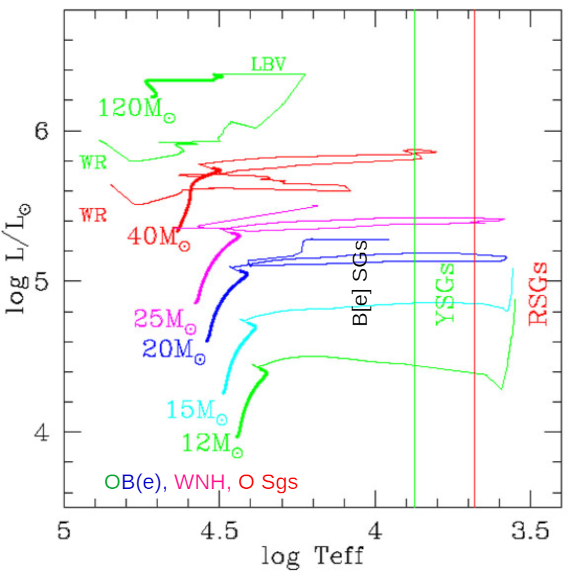

<center>Εικόνα 2. Μια εικόνα ενός διαγράμματος <a href="https://el.wikipedia.org/wiki/%CE%94%CE%B9%CE%AC%CE%B3%CF%81%CE%B1%CE%BC%CE%BC%CE%B1_%CE%A7%CE%AD%CF%81%CF%84%CE%B6%CF%83%CF%80%CF%81%CE%BF%CF%85%CE%BD%CE%B3%CE%BA-%CE%A1%CE%AC%CF%83%CE%B5%CE%BB"  target="_blank" rel="noopener noreferrer">Hertzsprung–Russell</a> το οποίο δείχνει πως εξελίσσονται τα άστρα μεγάλης μάζας περνώντας από διαφορετικές φάσεις κατά την διάρκεια της ζωής τους και πριν εκραγούν σαν υπερκαινοφανείς (supernovae). (ελαφρά διαμορφωμένη εικόνα από την εικ. 1 του <a href="https://ui.adsabs.harvard.edu/abs/2013NewAR..57...14M/abstract" target="_blank" rel="noopener noreferrer"> Massey et al. (2013)</a>).</center><br>


## Άνοιγμα αρχείου και εξέταση δεδομένων

_Σημείωση: υπάρχουν διάφοροι τρόποι για να ανοίξουμε και να επεξεργαστούμε δεδομένα. Στη συγκεκριμένη περίπτωση χρησιμοποιούμε την βιβλιοθήκη `pandas`, καθώς και τις βοηθητικές `numpy` και `matplotlib`, για διαχείριση πινάκων και διαγράμματα, αντίστοιχα._  

In [ ]:
import pandas as pd

# our data file
dfile = "LMC_phot_data.csv"

# open with pandas
data = pd.read_csv(dfile)

#examine data
print("Let us see what we have:\n")
print(data)
print("-"*25)
print("The column names:")
print(data.columns)
print("-"*25)
print("Let's print the spectral types only:")
print(data['SpT'])


Από τις στήλες βλέπουμε ότι το κάθε αντικείμενο (γραμμή) έχεις τις εξής παραμέτρους: 

- Όνομα (Name)
- Συντεταγμένες (RAJ2000, DEJ2000)
- Φωτομετρικές μετρήσεις σε διαφορετικά φίλτρα (U, e_U, B, e_B, ..., e_[24] - όπου το πρόθεμα e_ αντιστοιχεί στο σφάλμα της μέτρησης). 
- Φασμαστικό τύπο (SpT) που αντιστοιχεί στην κατηγορία (κλάση) που ανήκει το κάθε αντικείμενο.

Ας δούμε πόσα αντικείμενα έχουμε ανά κλάση.

In [ ]:
# returns the unique number of sources
unique_cls = data['SpT'].unique()

print("> Unique classes:", unique_cls)
print("="*25)
print("> SUMMARY of loaded data:")
print("="*25)

for sptype in unique_cls:
    number = data[data['SpT']==sptype].shape[0]
    print(f"{sptype:-<6s}--> {number:>3} stars")

In [ ]:
bands = [b for b in data.columns if 'e_' not in b][3:-1]

def reminder():
    """ 
    A simple function to print all bands
    and classes available.
    """
    print('Available bands to use: ')
    print(','.join(bands))
    print('-'*25)
    print('Available classes to use:')
    print(','.join(unique_cls))

In [ ]:
results = []

for spt in unique_cls:
    data_spt = data[data['SpT']==spt]
    number_spt = data_spt.shape[0]
#    print(spt, number_spt)

    row = {
        'Class': spt,
        'Total': number_spt
    }
    
    for b in bands:
        data_spt_bnd = data_spt[b]
        number_nn = data_spt_bnd.notna().sum()
        fraction = number_nn/number_spt
        
        row[b] = fraction * 100
            
#        print(b, fraction)
        
#    print(row)
    results.append(row)
    
phot_data_per = pd.DataFrame(results)

print(f'Available photometry for: {", ".join(bands)}')
print("\nNumber of stars per band (in %)\n")

phot_data_per.round(2)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 1</b>

Τι παρατηρείτε στον παραπάνω πίνακα;   

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Απάντηση >>> </summary></b>
1. Προσέξτε ότι δεν έχουν όλες οι κλάσεις τον ίδιο αριθμό αντικειμένων!
    
2. Πολλές πηγές έρχονται χωρίς μετρήσεις σε όλα τα φίλτρα. Αυτό αποτελεί ένα πρόβλημα για αλγόριθμους που χρειάζονται τιμές για να λειτουργήσουν.

Αυτό το πρόβλημα των <b>"ελλείπουσων τιμών" (missing values)</b> είναι πράγματι o κανόνας παρά η εξαίρεση. Υπάρχουν τρόποι για να αντιμετωπιστεί αυτό, για παράδειγμα, παίρνοντας τις μέσες τιμές των αντίστοιχων φίλτρων ή πιο λεπτομερείς τεχνικές. Ελέγξτε το <a href="https://scikit-learn.org/stable/modules/impute.html" target="_blank" rel="noopener noreferrer">εγχειρίδιο του scikit-learn για περισσότερες λεπτομέρειες</a>.    
</details>

## Ποιά από όλα αυτά τα δεδομένα είναι όμως απαραίτητα στο πρόβλημά μας;

> Tα χαρακτηριστικά είναι μετρήσιμες ιδιότητες ή/και κατηγορικά δεδομένα που χρησιμοποιούμε για να περιγράψουμε ή να διακρίνουμε/κατηγοριοποιήσουμε διαφορετικά αντικείμενα ή φαινόμενα.

Παραδείγματα:
- Πυρηνική φυσική: ενέργεια απορρόφησης σε έναν ανιχνευτή, αριθμός των φορτισμένων σωματιδίων που παράγονται.
- Μηχανική: κινητική ενέργεια, ταχύτητα, ορμή
- Θερμοδυναμική: θερμοκρασία, πίεση, εντροπία
- Αστροφυσική: θερμοκρασία, χρώμα, απόσταση, φασματικός τύπος 

_Προσέξτε_ ότι το τελευταίο δεν είναι ένας αριθμός αλλά μια κατηγοριοποίηση (π.χ. Μ5, Ο2). 

**Ερώτηση**

> Ποιά από όλα τα διαθέσιμα δεδομένα (χαρακτηριστικά) είναι αυτά που φέρουν την περισσότερη πληροφορία; 

Η απάντηση σε αυτό είναι σημαντική για κάθε είδους πρόβλημα (όσο και σε εφαρμογές μηχανικής μάθησης). 

Προσεγγίσεις:

- μια **χειροκίνητη** προσέγγιση - όπου εκμεταλευόμαστε την _οπτικοποίηση των δεδομένων και την πρότερη γνώση (domain knowledge) που έχουμε_, και 

- μια πιο **αυτοματοποιημένη** προσέγγιση - όπου εκμεταλευόμαστε την _εγγενή ιδιότητα ενός αλγορίθμου μηχανικής μάθησης_.  


## Χειροκίνητη επιλογή μέσω οπτικοποίησης δεδομένων

Σε αυτή την προσέγγιση οπτικοποιούμε τα δεδομένα μας και προσπαθούμε να βρούμε ποιος συνδυασμός φίλτρων μας προσφέρει τον καλύτερο διαχωρισμό για τις κλάσεις που έχουμε επιλέξει.

Μπορούμε να εκμεταλευτούμε (αν έχουμε) γνώση από το πεδίο (π.χ. τα κόκκινα άστρα θα ξεχωρίσουν από τα μπλε αν έχουμε τα κατάλληλα φίλτρα). 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def selmags( band1, band2, cls):
    """
    Function to select sources of a specific
    spectral class (cls) and return the magnitudes
    that correspond to bands 1 and 2.
        """
    # select all rows of the "cls" type
    data_cls = data[data['SpT']==cls]
#    print(band1, band2)
    mag1 = data_cls[band1].values
    mag2 = data_cls[band2].values
    
    return mag1, mag2


def plotmags( selected_bnd, selected_spt):
    """ Function to plot magnitudes and colors 
    for sources corresponding to the selected classes.
    NOTEs: 
        - selected_bnd: a list of four magnitudes
        - selected_spt: a list of selected spectral types
    
    Output: two sets of plots.
    """
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    legend_fs = 16

    print('- plot1:')
    for s in selected_spt: 
        plt1 = selmags( selected_bnd[0], selected_bnd[1], s)
        
        # calculate the number of sources to be plotted
        # both arrays have nan values, and plot is smart enough to 
        # not plot those points.
        # but we need to know what we are missing!
        mask1 = np.isfinite(plt1[0]) & np.isfinite(plt1[1])
        n_points_1_kept = np.count_nonzero(mask1)  
        print(f'-- {s}: excluding {len(plt1[0])-n_points_1_kept} out of {len(plt1[0])} sources ({(len(plt1[0])-n_points_1_kept)/len(plt1[0])*100:.1f}%)')


        ax[0,0].plot(plt1[0], plt1[1], 'o', label=f'{s}: {n_points_1_kept}')
        ax[0,0].set_xlabel(f'{selected_bnd[0]}') #'-{band1_2}')
        ax[0,0].set_ylabel(selected_bnd[1])
        ax[0,0].invert_yaxis()
        ax[0,0].invert_xaxis()
        ax[0,0].legend(fontsize=legend_fs)

        ax[0,1].plot(plt1[0]-plt1[1], plt1[1], 'o', label=f'{s}: {n_points_1_kept}')
        ax[0,1].set_xlabel(f'{selected_bnd[0]}-{selected_bnd[1]}')
        ax[0,1].set_ylabel(selected_bnd[1])
        ax[0,1].invert_yaxis()
        ax[0,1].legend(fontsize=legend_fs)


    print()
    print('- plot2:')        
    for s in selected_spt:
        plt2 = selmags( selected_bnd[2], selected_bnd[3], s)

        mask2 = np.isfinite(plt2[0]) & np.isfinite(plt2[1])
        n_points_2_kept = np.count_nonzero(mask2)
        print(f'-- {s}: excluding {len(plt2[0])-n_points_2_kept} out of {len(plt2[0])} sources ({(len(plt2[0])-n_points_2_kept)/len(plt2[0])*100:.1f}%)')

        ax[1,0].plot(plt2[0], plt2[1], 'o', label=f'{s}: {n_points_2_kept}')
        ax[1,0].set_xlabel(f'{selected_bnd[2]}') #'-{band2_2}')
        ax[1,0].set_ylabel(selected_bnd[3])
        ax[1,0].invert_yaxis()
        ax[1,0].invert_xaxis()    
        ax[1,0].legend(fontsize=legend_fs)

        ax[1,1].plot(plt2[0]-plt2[1], plt2[1], 'o', label=f'{s}: {len(plt2[0])}')
        ax[1,1].set_xlabel(f'{selected_bnd[2]}-{selected_bnd[3]}')
        ax[1,1].set_ylabel(selected_bnd[3])
        ax[1,1].invert_yaxis()
        ax[1,1].legend(fontsize=legend_fs)


    plt.show()

In [ ]:
reminder()

In [ ]:
plotmags(['B', 'V', 'H','K'], ['WR', 'OBA'])


<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 2</b>

Επιστρέψτε στο προηγούμενο κελί (με τα διαγράμματα) και αλλάξτε τα φίλτρα καθώς και τις κλάσεις που θέλετε να συμπεριλάβετε (μέσω του `selected_spt`) και απαντήστε στις ακόλουθες ερωτήσεις:

A. Βρείτε ένα συνδυασμό δύο κλάσεων και φίλτρων που διαχωρίζονται καλά τα αντικείμενα μεταξύ τους. 
    
Β. Τι συμβαίνει όταν αρχίσετε να αυξάνετε τον αριθμό των κλάσεων που συμπεριλαμβάνετε;
    
Γ. Πως η επιλογή των φίλτρων επηρεάζει τα αντικείμενα που κρατάτε;  

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<details>

<b><summary>Απάντηση >>> </summary></b>
    
Α. Ένας συνδυασμός που δουλεύει καλά είναι για τις κλάσεις 'RSG' και 'OBA', χρησιμοποιώντας τα φίλτρα 'V' και 'J', 'K' και 45'.

Β. Προσθέτοντας κλάσεις το πρόβλημα γίνεται πιο σύνθετο. Αντικείμενα από διαφορετικές κλάσεις αρχίζουν και αλληλεπικαλύπτονται με αποτέλεσμα ο διαχωρισμός τους να είναι πιο δύσκολος. 

Επίσης υπάρχουν συνδυασμοί φίλτρων που διαχωρίζουν καλύτερα κάποιες κλάσεις αλλά δεν υπάρχει απόλυτα ένας συνδυασμός που να δουλεύει τέλεια για όλες τις κλάσεις.

Γ. Για να κάνουμε τα διαγράμματα αυτά θα πρέπει τα αντικείμενα μας να έχουν μετρήσεις σε όλα τα φίλτρα που επιλέγουμε (έτσι ώστε να μπορεί να αναπαρασταθεί το σημείο). Έτσι ουσιαστικά εξαιρούμε αντικείμενα που δεν έχουν μετρήσεις σε κάποια από αυτές (πρόβλημα "ελλειπουσών τιμών"). Αυτό σημαίνει ότι όταν εξαιρούνται πολλά αντικείμενα μειώνονται (αισθητά σε κάποιες περιπτώσεις) τα διαθέσιμα αντικείμενα, το οποίο μεταφράζεται σε απώλεια πληροφορίας. 

</details>

### Συμπέρασμα 

- Μπορούμε εύκολα σχετικά να εντοπίσουμε χαρακτηριστικά τα οποία διαχωρίζουν τις κλάσεις που θέλουμε να ξεχωρίσουμε. 

- Ωστόσο, απαιτείται αρκετός πειραματισμός και αρκετοί συνδυασμοί.

- Μπορούν να μειωθούν εκμεταλευόμενοι γνώση από το πεδίο. 

- Περιοριζόμαστε σε διαγράμματα 2-3 διαστάσεων. 

- Δεν έχουμε μια ποσοτική εκτίμηση για το ποια χαρακτηρηστικά είναι πιο σημαντικά από άλλα.

## Αυτόματη επιλογή μέσω χρήσης αλγορίθμου

Σε αυτή την προσέγγιση χρησιμοποιούμε ένα αλγόριθμο (από μηχανική μάθηση) που μπορεί να μας  επιστρέψει μια τιμή "σημαντικότητας" για το κάθε χαρακτηριστικό, έτσι εύκολα να καταλάβουμε ποια είναι τα πιο σημαντικά. 

### Λειτουργία αλγορίθμου Δέντρου Απόφασης

Δέντρο Απόφασης (Decision Tree):

- δημοφιλής μέθοδος
- εύκολη στην κατανόηση 
- ιεραρχική δομή με διακλαδώσεις - κόμβους (κανόνες απόφασης) και φύλλα (πιθανά αποτελέσματα). 


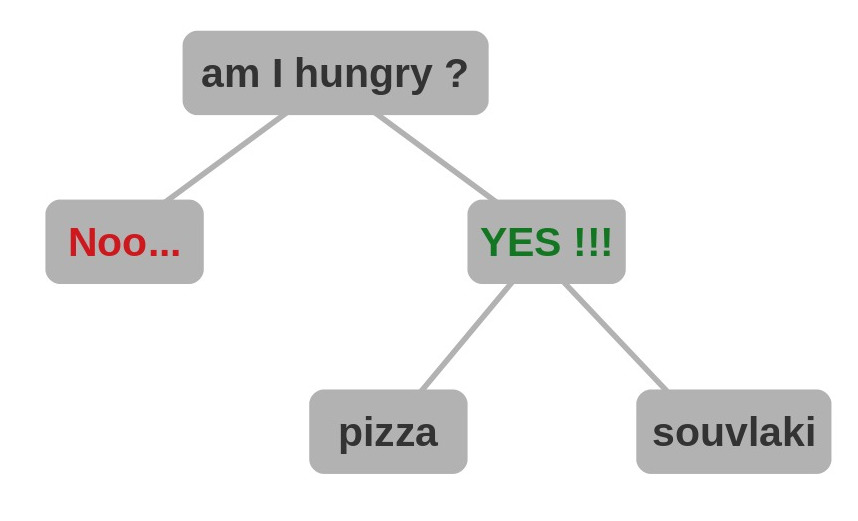
<center>Εικόνα 3. Σύντομη αλλά ακριβής εισαγωγή στα Δέντρα Απόφασης, μέσα από ένα καθημερινό παράδειγμα.<center><br>
 
Βήματα:

- Ξεκινά πρώτα εξερευνώντας ποιο από όλα τα διαθέσιμα χαρακτηριστικά οδηγούν στην καλύτερη διαίρεση των αντικειμένων.
    
- Καθορίζει το όριο του πιο σημαντικού χαρακτηριστικού στον ριζικό κόμβο (root node).
    
- Διαιρεί το αρχικό σετ αντικειμένων/δεδομένων σε δύο διαφορετικά "κλαδιά", το καθένα με αντικείμενα κάτω και πάνω από το όριο.  

- Σε καθε ένα από αυτά προχωράει και εξετάζει όλα τα υπόλοιπα χαρακτηριστικά προσπαθώντας και πάλι να βρει αυτό που διαιρεί βέλτιστα τα δεδομένα. Έτσι δημιουργεί και άλλους κόμβους (nodes) και κλαδιά. 

- Η διαδικασία συνεχίζεται μέχρι να φτάσει στους κόμβους-φύλλα (leaf nodes) που δεν μπορούν να διαιρεθούν περαιτέρω (ή να ενεργοποιηθεί κάποιο κριτήριο σταματήματος).

- Το κάθε φύλλο αντιστοιχεί σε μια κλάση που δίνεται από αυτήν που αντιπροσωπεύει την πλειονότητα των αντικειμένων στο φύλλο. 

Μέσα από αυτή την διαδικασία **ερευνά όλο τον χώρο των παραμέτρων** που του δίνουμε, και ιεραρχεί τα χαρακτηριστικά ανάλογα με το πόσο καλά διαχωρίζουν τα αντικείμενά μας. Τελικά, μπορεί να επιστρέψει μια **τιμή** που αντιστoιχεί στην "σημαντικότητά" τους (feature importance).
    
<div class="alert alert-info" style="margin-top: 20px", align='left'>    
<br>    
<details>

<summary>Σχετικά με το κριτήριο επιλογής στους κόμβους (περισσότερα) >>> </summary>
   
Για να μπορέσει ο αλγόριθμος να βρει το βέλτιστο τρόπο διαίρεσης των αντικειμένων θα πρέπει να χρησιμοποιηθεί μια μετρική που θα ποσοτικοποιεί αυτό το γεγονός. Μια τέτοια μετρική είναι ο **δείκτης μη-καθαρότητας Gini (Gini impurity)**, που υπολογίζει την πιθανότητα ενός αντικειμένου να έχει λάθος ταξινόμηση (κλάση) όταν επιλέγεται τυχαία. Δίνεται από τύπο:

$$ Gini = 1 - \sum\limits_{i=1}^{n} (p_i)^2 $$

όπου $n$ ο αριθμός των κλάσεων και $p_i$ είναι η πιθανότητα ενός αντικειμένου να ανήκει σε μια συγκεκριμένη κλάση με συγκεκριμένες τιμές της μεταβλητής (χαρακτηριστικού) που εξετάζεται.  Οι πιθανότητες αυτές αθροίζονται για όλες τις τιμές του χαρακτηριστικού και για όλες τις κλάσεις που αντιστοιχούν. 

Το Gini impurity για τον κόμβο καθορίζεται από τον μέσο όρο των τιμών αυτών για της κάθε κλάση διαιρεμένες με την συχνότητά τους ([για πιο αναλυτικό υπολογισμό](https://blog.quantinsti.com/gini-index/))

Αν όλα τα αντικείμενα σε ένα σύνολο έχουν την ίδια κλάση τότε το Gini = 0 (πλήρως καθαρό σύνολο). Αν ειναι 1 τότε ο κλάσεις των αντικειμένων είναι τυχαίες.   
    </details>

### Λειτουργία αλγορίθμου Τυχαία Δάση

Τυχαία Δάση (Random Forests, [Breiman (2001), Machine Learning, 45, 5](https://doi.org/10.1023/A:1010933404324)): 

- βασίζονται στην γενίκευση των Δέντρων Απόφασης
- δημιουργούν ένα μεγάλο αριθμό από Δέντρα Απόφασης μέσω 
    α. της **τυχαίας επιλογής ενός υποσυνόλου αντικειμένων** του συνολικού δείγματος, 
    β. της **τυχαίας επιλογής χαρακτηριστικών** από όλα τα διαθέσιμα στο δείγμα. 
    
Αυτή η τυχαιότητα μειώνει τη συσχέτιση μεταξύ των διαφορετικών (ατομικών) δέντρων. Καθώς το κάθε δέντρο έχει διαφορετική αρχικοποίηση, διαφορετικές συνθήκες στους κόμβους του και διαφορετική συνολική δομή, αυτή η ποικιλία οδηγεί σε συνολικά αξιόπιστες προβλέψεις.

Μπορούν να χρησιμοποιηθούν για την μελέτη της σημαντικότητας των χαρακτηριστικών. 


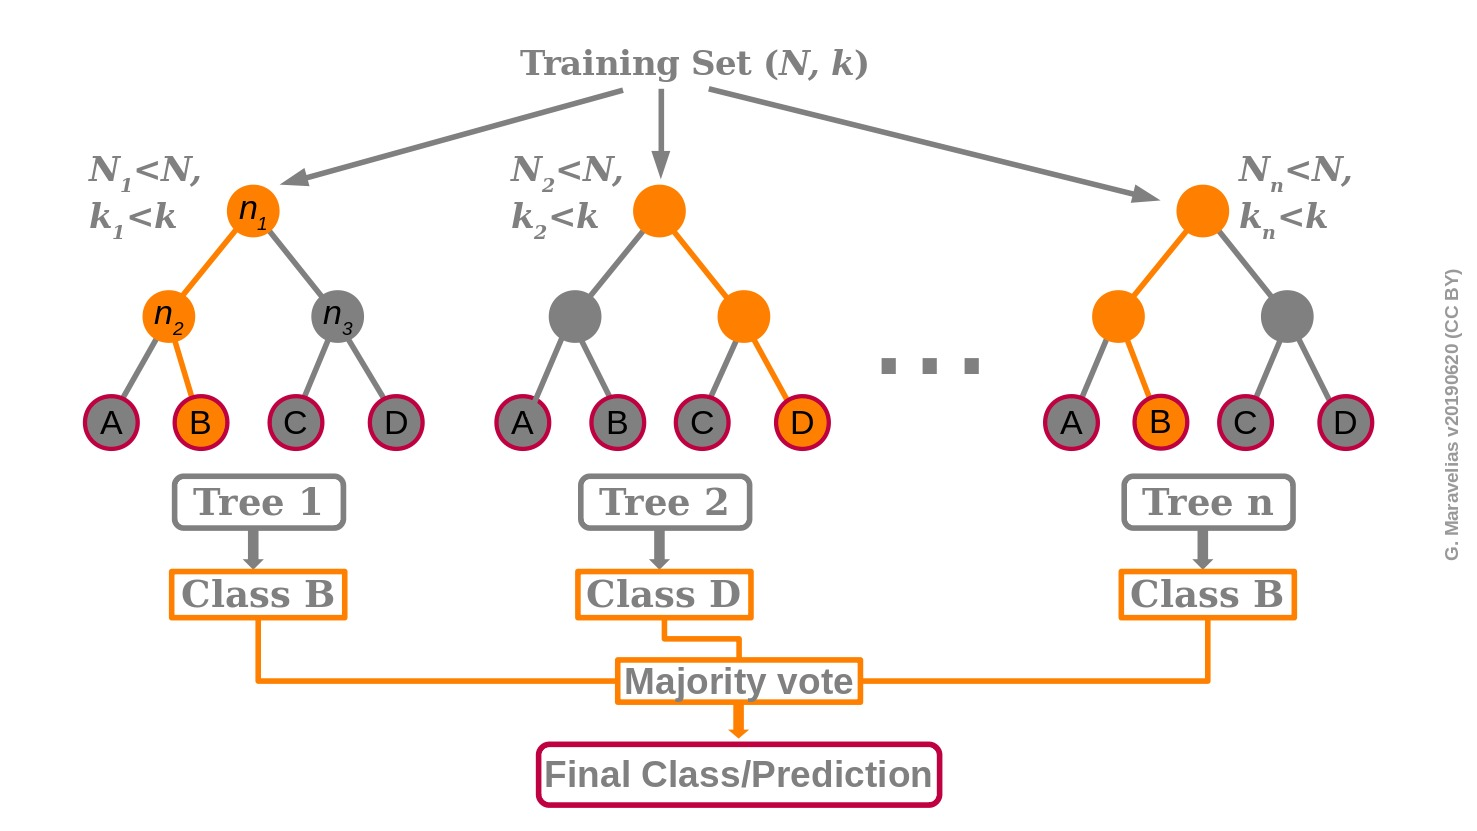
<center>Εικόνα 4. Σχηματική απεικόνιση ενός Τυχαίου Δάσους.</center>

  
#### Πλεονεκτήματα

1. Σαφές πλεονέκτημα σε σχέση με το Δέντρο Απόφασης, καθώς η τυχαιότητα τους οδηγεί σε πιο στιβαρή εκτίμηση της σημαντικότητας. 

1. Χρειάζονται ελάχιστη (αν όχι καθόλου) προεπεξεργασία δεδομένων (πχ μπορούν να δουλέψουν και με μη κανονικοποιημένα δεδομένα).

3. Μπορούν να διαχειριστούν μεγάλα σετ δεδομένων.

4. Είναι πιο ανθεκτικά σε μεταβολές των δεδομένων και λιγότερο πιθανά να οδηγήσουν σε υπερπροσαρμογή (ένα Δέντρο Απόφασης επηρεάζεται από την αλλαγή δείγματος).

    
#### Μειονεκτήματα    
    
1. Σε αντίθεση με τα Δέντρα Απόφασης δεν είναι εύκολα ερμηνεύσιμα.

2. Είναι πιθανό να οδηγήσουν σε υπερπροσαρμογή, ιδιαίτερα όταν επιλέγεται ένας μεγάλος αριθμός δέντρων και το δείγμα είναι μικρό. 

3. Ενώ μπορούν να διαχειριστούν μη ισορροπημένα δείγματα, σε ακραίες περιπτώσεις θα αποτύχουν. 

### Υλοποίηση

Για την υλοποίηση θα επιλέξουμε να διαχωρίσουμε την κλάση των Κόκκινων Υπεργιγάντων (RSG) από όλα τα άλλα αντικείμενα. Θα δούμε πως τα ακόλουθα χαρακτηριστικά (φωτομετρικές μετρήσεις) επηρεάζουν τον διαχωρισμό.


In [ ]:
reminder() # returns what is available

In [ ]:
# add any class to distinguish against the other available ones
class2keep_RF=['RSG']  
# select features to use
bands_selected_RF = ['V', 'J', 'K','[3.6]']  

Η παρακάτω συνάρτηση επερξεγάζεται τα δεδομένα, ανάλογα με τις παραπάνω επιλογές κλάσεων και φίλτρων που χρησιμοποιούμε. 

Στην δυαδική διαχείριση κάνει την εξής παραδοχή: όποιες κλάσεις εμπεριέχονται στην λίστα class2keep_RF τις ομαδοποιεί σε αυτές που ταξινομεί (classifying) και σε αυτές που λειτουργούν σαν διαφορετικές (contaminants).

Επιστρέφει μια σειρά από πίνακες που περιέχουν:

- ml_data_mags: την φωτομετρία (σε μεγέθη) ανά φίλτρο
- ml_data_clrs: το χρώμα (color index), δηλ την διαφορά ανάμεσα σε δύο φίλτρα
- ml_data_objs: το όνομα (ID) του αντικειμένου
- ml_labels   : τον φασματικό του τύπο ('SpT')

In [ ]:
def process_data( bands2use, binary_classes2use  ):
    """
    Process input data to return arrays 
    of magnitudes and (consecutive) colors
    based on the input bands (band2use).

    Option to prepare data for binary classification
    if binary_classes2use contains classes or not.
    
    Selected objects are assigned 1, while the contaminants 0.
    
    """
    data_diff = -data[bands2use].diff(axis=1).iloc[:, 1:]   
    data_diff.columns = [f"{c1}-{c2}" for c1, c2 in zip(bands2use[:-1], bands2use[1:])]
    diff_columns = data_diff.columns.values
#    print(data_diff)
#    print(data_diff.columns.values)

    working = pd.concat([data[['Name']+bands2use+['SpT']], data_diff], axis=1)
#    print(working)
    
    
    if len(binary_classes2use)!=0:
        working['keep'] = working['SpT'].isin(binary_classes2use).astype(int)
    else:
        working['keep'] = working['SpT']
        
    # remove all nan rows
    working_clean = working.dropna()
    

    print(f'# stars with mags in:\n',
          f'{",".join([bb for bb in bands2use])}'
         )
    print("=========================")
    print("Type    initial    final ")
    print("-------------------------")
       
    for s in unique_cls:
        print(
            f"{s:<4}  {(working['SpT']==s).sum():>9}",
            f"{(working_clean['SpT']==s).sum():>8}"
        )
    print('-'*24)
    print(f'TOTAL:  {working.shape[0]:>7}  {working_clean.shape[0]:>7}') 

    if len(binary_classes2use)!=0:
        print('='*24)
        print(f"classifying:  {(working_clean['keep']==1).sum():>10}") 
        print(f"contaminants: {(working_clean['keep']==0).sum():>10}") 
        
        data_labels = working_clean['keep'].to_numpy()
    
    else:
        data_labels = working_clean['SpT'].to_numpy()
    
#    print(working_clean[diff_columns])
    
    data_mags = working_clean[bands2use].to_numpy()
    data_clrs = working_clean[diff_columns].to_numpy() 
    data_objects = working_clean['Name'].to_numpy()
          
    return data_mags, data_clrs, data_objects, data_labels  


In [ ]:
ml_data_mags, ml_data_clrs, ml_objects, ml_labels = process_data( bands_selected_RF, class2keep_RF)

X = ml_data_mags   # 
y = ml_labels

Ο παραπάνω πίνακας μας δίνει τον αριθμό των αντικειμένων που έχουν μετρήσεις στα αντίστοιχα φίλτρα που έχουν επιλεγεί, χωρίζοντας τον στις δύο κλάσεις. 

Για να χρησιμοποιήσουμε τα Τυχαία Δάση θα πρέπει να καλέσουμε τον αλγόριθμο `RandomForestClassifier()` από το module `sklearn.ensemble` ([περισσότερα](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)). 

Πρώτα θα πρέπει να "τρέξει" στα δεδομένα μας, οπότε και εφαρμόζουμε την μέθοδο `.fit()`. Χρησιμοποιούμε `n_estimators=250` που σημαίνει ότι αλλάζουμε τον αριθμό των αρχικών τυχαίων δέντρων από 100 σε 250. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# load model
clfrf = RandomForestClassifier(n_estimators=250)
# apply to our data
clfrf.fit(X, y)
# return importance
rf_importance = clfrf.feature_importances_

print("Importance per feature: ")
for i,b in zip(rf_importance, bands_selected_RF):
    print(f'  {b} : {i:0.3f}')


In [ ]:
# Visualize the result

plt.figure(figsize=(8,4))
sorted_idx = np.argsort(rf_importance)[::-1]  # descending order

plt.bar(np.arange(len(bands_selected_RF)), rf_importance[sorted_idx], width=0.3)
plt.xticks(np.arange(len(bands_selected_RF)), ( np.asarray(bands_selected_RF))[sorted_idx])
plt.ylabel('Feature Importance')
plt.title(f'Feature Importance for selected bands {bands_selected_RF}')
plt.show()

<div class="alert alert-block alert-warning" style="margin-top: 20px">
    <b>Άσκηση 3</b>

Επιστρέψτε στο αρχικό κελί επιλογή κλάσεων και χαρακτηριστικών (κάτω από την "Υλοποίηση"), και κάντε διαφορετικές επιλογές. Τρέξτε τα κελιά μέχρι το τέλος να δείτε πως αλλάζει η σημαντικότητα των επιλεγμένων χαρακτηριστικών ανάλογα με τον αριθμό κλάσεων και χαρακτηρηστικών (φωτομετρία) που προσθέτετε/αλλάζετε. 

### Συμπέρασμα 

- Ο αλγόριθμος μας επιστρέφει την "σημαντικότητα" των χαρακτηριστικών (feature importance), με σειρά 'K', 'J', '36' και 'V'. 

- Οι τιμές αντιστοιχούν στο ποσοστό συμβολής. 

- Το πιο σημαντικό φίλτρο 'Κ' φτάνει σχεδόν στο 50%. 

- Η τιμή για το 'V' είναι πολύ χαμηλά (<10%), που σημαίνει ότι μπορούμε να το αποκλείσουμε από την ανάλυσή μας (δεν συμβάλει σημαντικά).


## Ανακεφαλαίωση

Σε **οποιοδήποτε πρόβλημα** ανάλυσης δεδομένων και μηχανικής μάθησης είναι κρίσιμο:

- να εξετάσουμε τα δεδομένα μας, και 
- να διαλέξουμε ποια από αυτά φέρουν την σημαντικότερη πληροφορία. 

Για την επιλογή των χαρακτηριστικών αυτών μπορούμε να χρησιμοποιήσουμε:

- _χειροκίνητη προσέγγιση_ - όπου μέσα από την οπτικοποίηση των δεδομένων μας και ενδεχόμενα την γνώση του χώρου που έχουμε,

- _αυτοματοποιήμένη προσέγγιση_ - όπου μέσα από ένα αλγόριθμο προκύπτει η σημαντικότητα κάθε χαρακτηριστικού. 

Δεν χρειάζεται έτσι να κουβαλάμε στην ανάλυσή μας χαρακτηριστικά (δεδομένα) τα οποία δεν είναι χρήσιμα, καθώς αυτό **μειώνει τις διαστάσεις και άρα την πολυπλοκότητα της λύσης**.

Επίσης, δεν σημαίνει ότι αυτές οι δύο προσεγγίσεις λειτουργούν αποκλείοντας η μία την άλλη. Αντίθετα, ο συνδυασμός τους, δηλαδή η **αξιοποίηση της φυσικής γνώσης με αυτοματοποιημένες μεθόδους** (που "βλέπουν" καλύτερα σε χώρους Ν-διαστάσεων) δίνει πιο **αξιόπιστα και ερμηνεύσιμα** αποτελέσματα. 

In [ ]:
# EOF